In [12]:
import numpy as np
import xarray as xr
import cartopy, matplotlib, glob
import matplotlib.pyplot as plt

In [69]:
files=glob.glob("/Users/lizdrenkard/external_data/Hollings_2020/*.nc")
files

['/Users/lizdrenkard/external_data/Hollings_2020/zooplankton_data_luo.nc',
 '/Users/lizdrenkard/external_data/Hollings_2020/export_data_luo.nc',
 '/Users/lizdrenkard/external_data/Hollings_2020/primary_production_luo.nc']

In [70]:
ds_all = xr.open_mfdataset(files,combine="by_coords")
ds_all.TIME

<xarray.DataArray 'TIME' (TIME: 12)>
array([cftime.DatetimeNoLeap(2007-01-16 12:00:00),
       cftime.DatetimeNoLeap(2007-02-15 00:00:00),
       cftime.DatetimeNoLeap(2007-03-16 12:00:00),
       cftime.DatetimeNoLeap(2007-04-16 00:00:00),
       cftime.DatetimeNoLeap(2007-05-16 12:00:00),
       cftime.DatetimeNoLeap(2007-06-16 00:00:00),
       cftime.DatetimeNoLeap(2007-07-16 12:00:00),
       cftime.DatetimeNoLeap(2007-08-16 12:00:00),
       cftime.DatetimeNoLeap(2007-09-16 00:00:00),
       cftime.DatetimeNoLeap(2007-10-16 12:00:00),
       cftime.DatetimeNoLeap(2007-11-16 00:00:00),
       cftime.DatetimeNoLeap(2007-12-16 12:00:00)], dtype=object)
Coordinates:
  * TIME     (TIME) object 2007-01-16 12:00:00 ... 2007-12-16 12:00:00
Attributes:
    time_origin:    01-JAN-1888 00:00:00
    axis:           T
    standard_name:  time
    bounds:         TIME_bnds

In [27]:
ds = xr.open_dataset('/Users/lizdrenkard/external_data/Hollings_2020/primary_production_luo.nc')
ds.PRIMARY_PROD



<xarray.DataArray 'PRIMARY_PROD' (TIME: 12, YT_OCEAN: 200, XT_OCEAN: 360)>
[864000 values with dtype=float64]
Coordinates:
  * XT_OCEAN  (XT_OCEAN) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * YT_OCEAN  (YT_OCEAN) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
  * TIME      (TIME) object 2007-01-16 12:00:00 ... 2007-12-16 12:00:00
Attributes:
    long_name:  (JUPTAKE_NO3_LG[K=1:20@SUM,D=3] + JUPTAKE_NO3_SM[K=1:20@SUM,D...

/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


(200, 360)

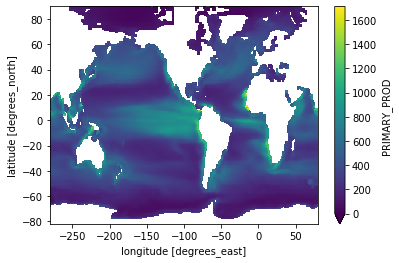

In [21]:
# plot of mean primary production over the whole year
ds_all.PRIMARY_PROD.mean(dim='TIME').plot(vmin=0)
ds_all.PRIMARY_PROD.mean(dim='TIME').shape


/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'TIME' (TIME: 2)>
array([cftime.DatetimeNoLeap(2007-06-16 00:00:00),
       cftime.DatetimeNoLeap(2007-07-16 12:00:00)], dtype=object)
Coordinates:
  * TIME     (TIME) object 2007-06-16 00:00:00 2007-07-16 12:00:00
Attributes:
    time_origin:    01-JAN-1888 00:00:00
    axis:           T
    standard_name:  time
    bounds:         TIME_bnds

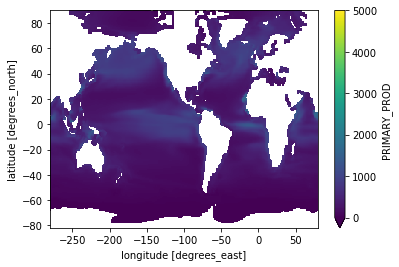

In [62]:
# this is jan-march mean primary production
ds_all.PRIMARY_PROD.isel(TIME=slice(5,8)).mean(dim='TIME').plot(vmin=0,vmax=5000)
ds.PRIMARY_PROD.isel(TIME=slice(5,7)).TIME

/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


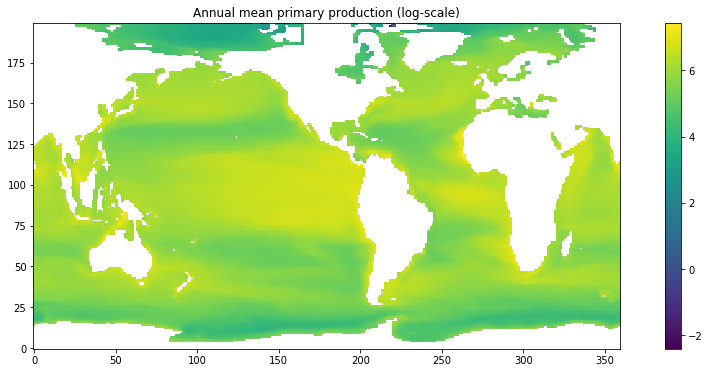

In [5]:
# plot of mean primary production on the log scale
plt.figure(figsize=(16,6))
field=np.log(ds.PRIMARY_PROD.mean(dim='TIME').values)
plt.imshow(field, origin='bottom')
plt.title('Annual mean primary production (log-scale)')
plt.colorbar()

In [45]:
np.arange(5,10)

array([5, 6, 7, 8, 9])

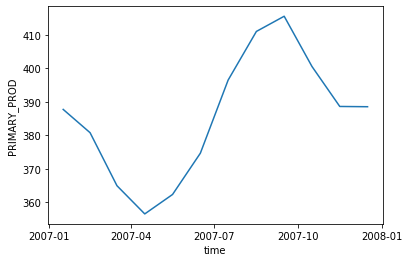

In [6]:
# plotting the primary production annual cycle
ds.PRIMARY_PROD.mean(dim=['YT_OCEAN','XT_OCEAN']).plot()

In [63]:
ds_all

<xarray.Dataset>
Dimensions:             (ST_OCEAN10_10: 1, ST_OCEAN35_35: 1, TIME: 12, XT_OCEAN: 360, YT_OCEAN: 200, bnds: 2)
Coordinates:
  * XT_OCEAN            (XT_OCEAN) float64 -279.5 -278.5 -277.5 ... 78.5 79.5
  * YT_OCEAN            (YT_OCEAN) float64 -81.5 -80.5 -79.5 ... 87.5 88.5 89.5
  * ST_OCEAN10_10       (ST_OCEAN10_10) float64 95.0
  * TIME                (TIME) object 2007-01-16 12:00:00 ... 2007-12-16 12:00:00
  * ST_OCEAN35_35       (ST_OCEAN35_35) float64 1.007e+03
Dimensions without coordinates: bnds
Data variables:
    YT_OCEAN_bnds       (YT_OCEAN, bnds) float64 dask.array<where, shape=(200...
    ST_OCEAN10_10_bnds  (ST_OCEAN10_10, bnds) float64 dask.array<open_dataset...
    TIME_bnds           (TIME, bnds) object dask.array<where, shape=(12, 2), ...
    FCDET_100           (TIME, ST_OCEAN10_10, YT_OCEAN, XT_OCEAN) float64 das...
    ST_OCEAN35_35_bnds  (ST_OCEAN35_35, bnds) float64 dask.array<open_dataset...
    FCDET_1000          (TIME, ST_OCEAN35_35, YT_OCEAN, XT_OCEAN) float64 das...
    FCDET_BTM           (TIME, YT_OCEAN, XT_OCEAN) float64 dask.array<open_da...
    GEOLAT_T            (YT_OCEAN, XT_OCEAN) float32 dask.array<where, shape=...
    GEOLON_T            (YT_OCEAN, XT_OCEAN) float32 dask.array<where, shape=...
    SMALLZOO_BIOMASS    (TIME, YT_OCEAN, XT_OCEAN) float64 dask.array<open_da...
    MEDZOO_BIOMASS      (TIME, YT_OCEAN, XT_OCEAN) float64 dask.array<open_da...
    LARGEZOO_BIOMASS    (TIME, YT_OCEAN, XT_OCEAN) float64 dask.array<open_da...
    SMALLZOO_PROD       (TIME, YT_OCEAN, XT_OCEAN) float64 dask.array<open_da...
    MEDZOO_PROD         (TIME, YT_OCEAN, XT_OCEAN) float64 dask.array<open_da...
    LARGEZOO_PROD       (TIME, YT_OCEAN, XT_OCEAN) float64 dask.array<open_da...
    PRIMARY_PROD        (TIME, YT_OCEAN, XT_OCEAN) float64 dask.array<open_da...
Attributes:
    history:      FERRET V6.85 (beta) 20-Oct-14
    Conventions:  CF-1.0

In [71]:
bm_pp_ratio=((ds_all.SMALLZOO_BIOMASS) + (ds_all.MEDZOO_BIOMASS) + (ds_all.LARGEZOO_BIOMASS))/((ds_all.SMALLZOO_PROD) + (ds_all.MEDZOO_PROD) + (ds_all.LARGEZOO_PROD))


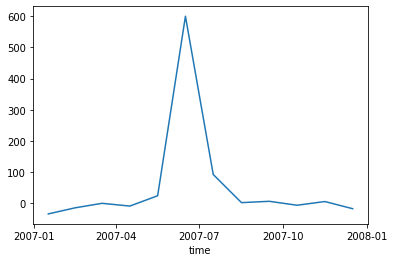

In [68]:
bm_pp_ratio.mean(dim=["XT_OCEAN","YT_OCEAN"]).plot()


In [72]:
micro_ratio = ds_all.SMALLZOO_PROD/ ds.PRIMARY_PROD

In [73]:
micro_ratio

<xarray.DataArray (TIME: 12, YT_OCEAN: 200, XT_OCEAN: 360)>
dask.array<truediv, shape=(12, 200, 360), dtype=float64, chunksize=(12, 200, 360), chunktype=numpy.ndarray>
Coordinates:
  * XT_OCEAN  (XT_OCEAN) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * YT_OCEAN  (YT_OCEAN) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
  * TIME      (TIME) object 2007-01-16 12:00:00 ... 2007-12-16 12:00:00

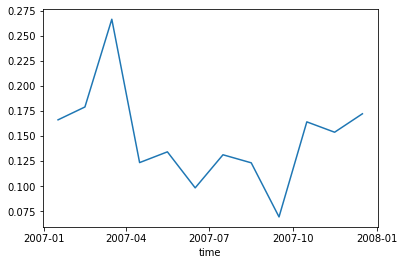

In [75]:
micro_ratio.mean(dim=["XT_OCEAN","YT_OCEAN"])
micro_ratio.mean(dim=["XT_OCEAN","YT_OCEAN"]).plot()


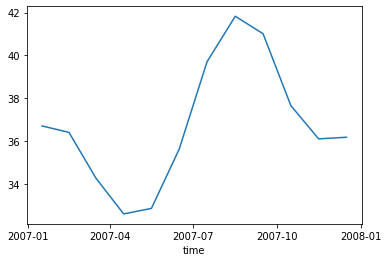

In [80]:
t_mesoz = (ds_all.MEDZOO_PROD + ds_all.LARGEZOO_PROD)
t_mesoz.mean(dim=["XT_OCEAN","YT_OCEAN"])
t_mesoz.mean(dim=["XT_OCEAN","YT_OCEAN"]).plot()

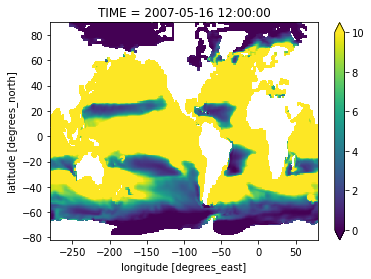

In [81]:
t_mesoz.isel(TIME=4).plot(vmin=0,vmax=10)

/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


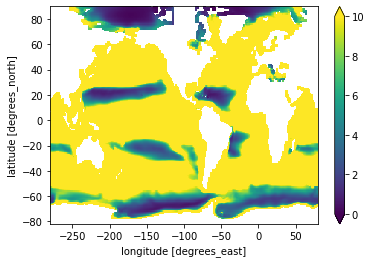

In [83]:
t_mesoz.isel(TIME=slice(0,11)).mean(dim=["TIME"]).plot(vmin=0,vmax=10)

In [85]:
meso_bm = ds_all.MEDZOO_BIOMASS + ds_all.LARGEZOO_BIOMASS
meso_bm

<xarray.DataArray (TIME: 12, YT_OCEAN: 200, XT_OCEAN: 360)>
dask.array<add, shape=(12, 200, 360), dtype=float64, chunksize=(12, 200, 360), chunktype=numpy.ndarray>
Coordinates:
  * XT_OCEAN  (XT_OCEAN) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * YT_OCEAN  (YT_OCEAN) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
  * TIME      (TIME) object 2007-01-16 12:00:00 ... 2007-12-16 12:00:00

In [86]:
meso_bm.mean(dim=["XT_OCEAN","YT_OCEAN"])

<xarray.DataArray (TIME: 12)>
dask.array<mean_agg-aggregate, shape=(12,), dtype=float64, chunksize=(12,), chunktype=numpy.ndarray>
Coordinates:
  * TIME     (TIME) object 2007-01-16 12:00:00 ... 2007-12-16 12:00:00

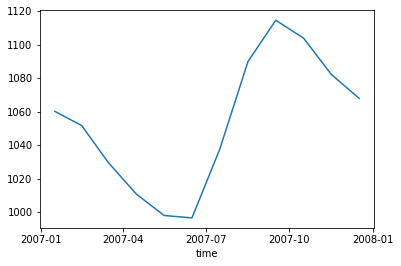

In [87]:
meso_bm.mean(dim=["XT_OCEAN","YT_OCEAN"]).plot()

/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


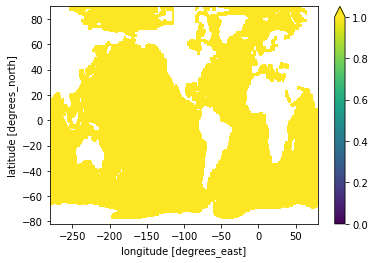

In [88]:
meso_bm.isel(TIME=slice(0,11)).mean(dim=["TIME"]).plot(vmin=0,vmax=1)

In [89]:
total_bm = ds_all.SMALLZOO_BIOMASS + ds_all.MEDZOO_BIOMASS + ds_all.LARGEZOO_BIOMASS

In [90]:
total_bm

<xarray.DataArray (TIME: 12, YT_OCEAN: 200, XT_OCEAN: 360)>
dask.array<add, shape=(12, 200, 360), dtype=float64, chunksize=(12, 200, 360), chunktype=numpy.ndarray>
Coordinates:
  * XT_OCEAN  (XT_OCEAN) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * YT_OCEAN  (YT_OCEAN) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
  * TIME      (TIME) object 2007-01-16 12:00:00 ... 2007-12-16 12:00:00

In [92]:
total_pp=(ds_all.SMALLZOO_PROD + ds_all.MEDZOO_PROD + ds_all.LARGEZOO_PROD)

In [93]:
pp_vs_bm = total_pp/total_bm

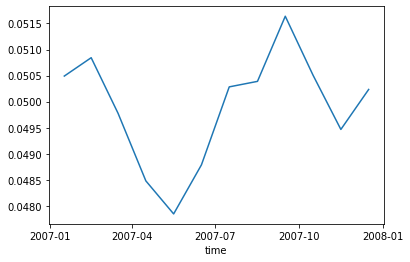

In [94]:
pp_vs_bm.mean(dim=["XT_OCEAN","YT_OCEAN"]).plot()

In [ ]:
isel(XT_OCEAN=slice(0,11))

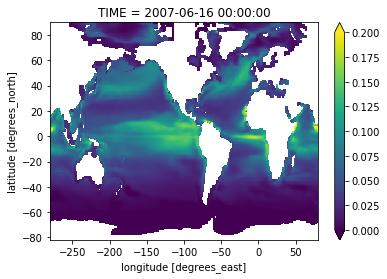

In [96]:
pp_vs_bm.isel(TIME=5).plot(vmin=0,vmax=.2)

/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


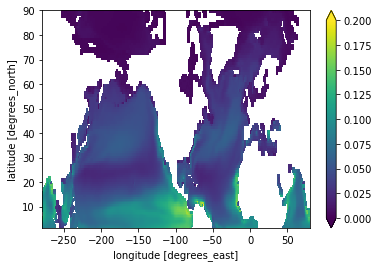

In [101]:
pp_vs_bm.isel(TIME=slice(0,12)).isel(YT_OCEAN=slice(100,201)).mean(dim=["TIME"]).plot(vmin=0,vmax=.2)

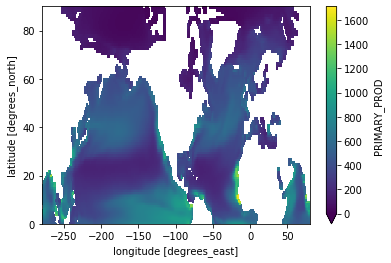

In [105]:
ds.PRIMARY_PROD.sel(YT_OCEAN=slice(0,91)).mean(dim=["TIME"]).plot(vmin=0)

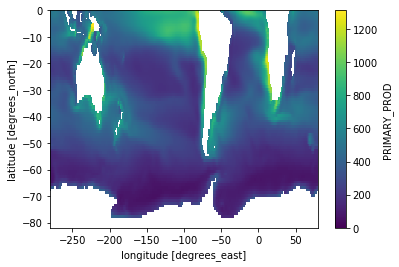

In [107]:
ds.PRIMARY_PROD.sel(YT_OCEAN=slice(-91,0)).mean(dim=["TIME"]).plot(vmin=0)

In [108]:
ds_all.PRIMARY_PROD.mean(dim='TIME')


<xarray.DataArray 'PRIMARY_PROD' (YT_OCEAN: 200, XT_OCEAN: 360)>
dask.array<mean_agg-aggregate, shape=(200, 360), dtype=float64, chunksize=(200, 360), chunktype=numpy.ndarray>
Coordinates:
  * XT_OCEAN  (XT_OCEAN) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * YT_OCEAN  (YT_OCEAN) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5

In [109]:
np.log10(ds_all.PRIMARY_PROD.mean(dim='TIME'))

<xarray.DataArray 'PRIMARY_PROD' (YT_OCEAN: 200, XT_OCEAN: 360)>
dask.array<log10, shape=(200, 360), dtype=float64, chunksize=(200, 360), chunktype=numpy.ndarray>
Coordinates:
  * XT_OCEAN  (XT_OCEAN) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * YT_OCEAN  (YT_OCEAN) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5

In [110]:
np.log10(ds_all.PRIMARY_PROD.mean(dim='TIME').values)

/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [111]:
np.log10(0)

/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


-inf

In [112]:
np.log10(ds_all.PRIMARY_PROD.mean(dim='TIME').values).plot()

/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


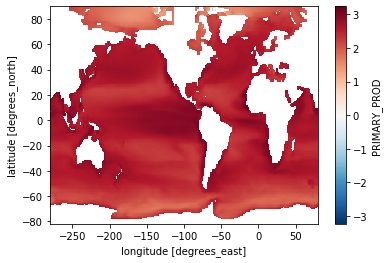

In [113]:
v

/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


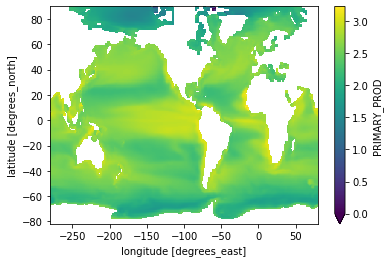

In [114]:
np.log10(ds_all.PRIMARY_PROD.mean(dim='TIME')).plot(vmin=0)

In [115]:
test =np.log10(ds_all.PRIMARY_PROD.mean(dim='TIME').values)


/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


In [116]:
log_npp = np.log10(ds.PRIMARY_PROD.mean(dim="TIME").values)

/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


In [117]:
ds.PRIMARY_PROD.mean(dim="TIME").values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [118]:
np.log10(ds.PRIMARY_PROD.mean(dim="TIME").values)

/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [119]:
log_npp = np.log10(ds.PRIMARY_PROD.mean(dim="TIME").values)

/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


In [120]:
log_npp.plot()


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/lizdrenkard/opt/anaconda3/envs/mom6/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


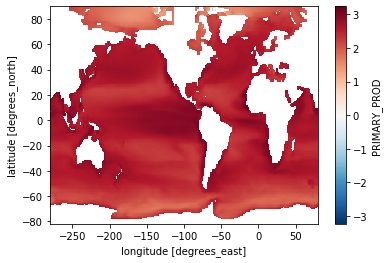

In [121]:
np.log10(ds_all.PRIMARY_PROD.mean(dim='TIME')).plot()